## Observations and Insights 

1. The mice are distributioned fairly among different drug regimens experiment. Eight drug regimens 
   have data from 25 mice, the other 2 drug regimens have data from 24 mice. And there are almost the 
   same number of male and female mice.
2. Capomulin and Ramicane have better performance in curbing the growth of tumor from statistics summary.
3. There is one outlier in the final tumor volume of Infubinol, need to investigate it.
4. For the mouse that was treated with Capomulin, the tumor volume was decreasing as time went by.
5. For the mice treated with Capomulin, there is a strong positive correlation between mouse weight and average tumor volume.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,how = 'outer', 
                       on = 'Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = len(combined_df["Mouse ID"].unique())
print(f"The number of mice for experiment is {number_mice}.")

The number of mice for experiment is 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice = duplicate_mice_df['Mouse ID'].unique()
print(f"The duplicate mouse ID is {duplicate_mice[0]}.")


The duplicate mouse ID is g989.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_df.loc[combined_df["Mouse ID"]=='g989', : ]
duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df['Mouse ID'] != 'g989']
cleaned_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_cleaned = len(cleaned_df["Mouse ID"].unique())
print(f"The number of mice in the clean DataFrame is {number_mice_cleaned}.")

The number of mice in the clean DataFrame is 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
regimen_tumor=[]
mean_regimen=[]
median_regimen=[]
variance_regimen=[]
std_regimen=[]
sem_regimen=[]

for i in range(10):
    regimen_tumor.append(cleaned_df.loc[cleaned_df['Drug Regimen']==regimen[i], "Tumor Volume (mm3)"])
    mean_regimen.append(np.mean(regimen_tumor[i]))
    median_regimen.append(np.median(regimen_tumor[i]))
    variance_regimen.append(np.var(regimen_tumor[i],ddof = 0))
    std_regimen.append(np.std(regimen_tumor[i],ddof = 0))
    sem_regimen.append(stats.sem(regimen_tumor[i],ddof = 0))
        
summary_stastics_df = pd.DataFrame({"Drug Regimen":regimen, "Mean":mean_regimen, "Median":median_regimen,
                                    "Variance":variance_regimen,"Standard Variation":std_regimen,"SEM":sem_regimen})
summary_stastics_df=summary_stastics_df.set_index("Drug Regimen")
summary_stastics_df

,Mean,Median,Variance,Standard Variation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = cleaned_df.groupby("Drug Regimen")
tumor_mean = regimen_group["Tumor Volume (mm3)"].mean()
tumor_median = regimen_group["Tumor Volume (mm3)"].median()
tumor_var = regimen_group["Tumor Volume (mm3)"].var()
tumor_std = regimen_group["Tumor Volume (mm3)"].std()
tumor_sem = regimen_group["Tumor Volume (mm3)"].sem()
# This method produces everything in a single groupby function
summary_stastics = pd.DataFrame({"Mean": tumor_mean, "Median":tumor_median, "Variance":tumor_var,
                                "Standard Variation":tumor_std,"SEM":tumor_sem})
summary_stastics


,Mean,Median,Variance,Standard Variation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

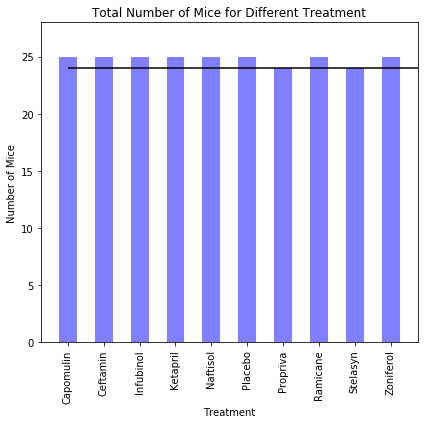

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

miceNumber_and_treatment = regimen_group["Mouse ID"].nunique()
miceNumber_and_treatment.plot(kind="bar",figsize=(6,6),facecolor = "b",
                             alpha =0.5, align = "center")

plt.title("Total Number of Mice for Different Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")
plt.xlim(-0.75, len(miceNumber_and_treatment)-0.25)
plt.ylim(0,max(miceNumber_and_treatment)+3)

plt.tight_layout()
plt.show()


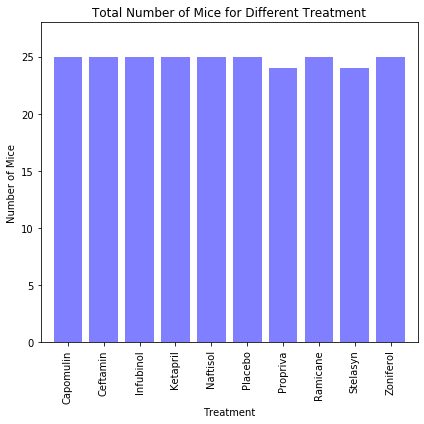

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
number = regimen_group["Mouse ID"].nunique()
x_axis = np.arange(len(number))
plt.figure(figsize=(6,6))
plt.bar(x_axis, number, color = "b", alpha =0.5, align = "center" )
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",
                            "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
          rotation="vertical")

plt.title("Total Number of Mice for Different Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")
plt.xlim(-0.75, len(miceNumber_and_treatment)-0.25)
plt.ylim(0,max(miceNumber_and_treatment)+3)
plt.tight_layout()
plt.show()

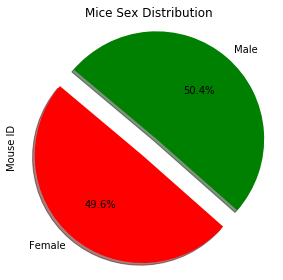

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_group = cleaned_df.groupby(["Sex"])
sex_number = sex_group["Mouse ID"].nunique()

sex_pie = sex_number.plot(kind="pie", labels = ["Female","Male"],colors=["red","green"], 
                          autopct="%1.1f%%",title = "Mice Sex Distribution",explode=(0.1,0.1),
                         shadow=True,startangle=140,figsize=(4, 4))

plt.tight_layout()
plt.axis("equal")
plt.show()

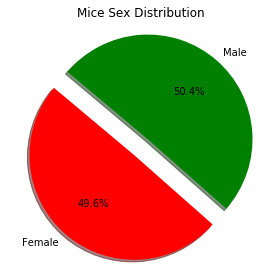

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_group = cleaned_df.groupby(["Sex"])
sex_number = sex_group["Mouse ID"].nunique()
labels = ["Female","Male"]
sizes = sex_number
colors = ["red","green"]
explode = (0.1,0.1)

plt.figure(figsize=(4,4))
plt.pie(sizes,explode=explode, labels=labels, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Mice Sex Distribution")
plt.tight_layout()
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cleaned_df.head()
four_cleaned_df=cleaned_df.loc[(cleaned_df["Drug Regimen"]=="Capomulin") | (cleaned_df["Drug Regimen"]=="Ramicane") | 
                               (cleaned_df["Drug Regimen"]=="Infubinol") | (cleaned_df["Drug Regimen"]=="Ceftamin"), : ]

# Start by getting the last (greatest) timepoint for each mouse
group_after = four_cleaned_df.groupby(["Drug Regimen", "Mouse ID"])
last_timepoint = group_after["Timepoint"].max()
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = pd.merge(last_timepoint,cleaned_df, on =["Mouse ID", "Timepoint"], how = "left")
tumor_volume_list=tumor_volume["Tumor Volume (mm3)"]
tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,45,Ramicane,Male,1,17,30.276232,0
96,u196,45,Ramicane,Male,18,25,40.667713,3
97,w678,5,Ramicane,Female,5,24,43.166373,0
98,y449,15,Ramicane,Male,19,24,44.183451,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin","Ceftamin","Infubinol","Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
four_treatment=[tumor_volume.loc[tumor_volume["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"],
               tumor_volume.loc[tumor_volume["Drug Regimen"]=="Ceftamin","Tumor Volume (mm3)"],
               tumor_volume.loc[tumor_volume["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"],
               tumor_volume.loc[tumor_volume["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"]]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

for i in range(4):
    quartiles = four_treatment[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {treatments_list[i]} treatment, values below {round(lower_bound,2)} or above {round(upper_bound,2)} could be outliers.")   
            

For Capomulin treatment, values below 20.7 or above 51.83 could be outliers.
For Ceftamin treatment, values below 25.36 or above 87.67 could be outliers.
For Infubinol treatment, values below 36.83 or above 82.74 could be outliers.
For Ramicane treatment, values below 17.91 or above 54.31 could be outliers.


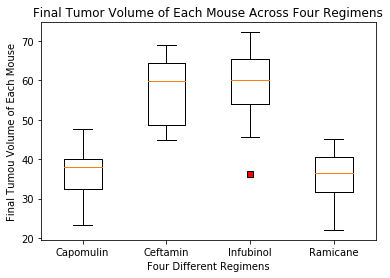

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(four_treatment, flierprops=dict(markerfacecolor='r', marker='s'), labels= treatments_list)
plt.title("Final Tumor Volume of Each Mouse Across Four Regimens")
plt.xlabel("Four Different Regimens")
plt.ylabel("Final Tumou Volume of Each Mouse")
plt.show()


## Line and Scatter Plots

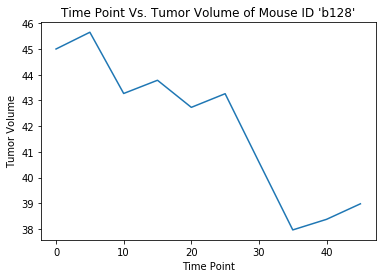

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_point_b128 = cleaned_df.loc[cleaned_df["Mouse ID"]=="b128","Timepoint"]
tumor_volume_b128 = cleaned_df.loc[cleaned_df["Mouse ID"]=="b128", "Tumor Volume (mm3)"]
plt.plot(time_point_b128,tumor_volume_b128)
plt.title("Time Point Vs. Tumor Volume of Mouse ID 'b128'")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")

plt.show()

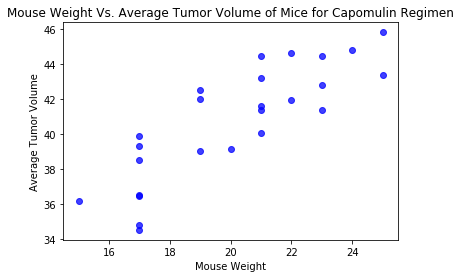

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_regimen = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin", :]
capomulin_regimen_group = capomulin_regimen.groupby("Mouse ID")

mouse_weight= capomulin_regimen_group["Weight (g)"].mean()
tumor_volume_average=capomulin_regimen_group["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight, tumor_volume_average, marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)
plt.title("Mouse Weight Vs. Average Tumor Volume of Mice for Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84.


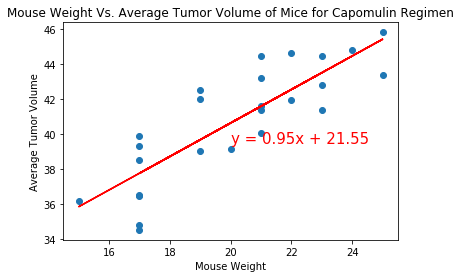

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

correlation = st.pearsonr(mouse_weight,tumor_volume_average)
correlation
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}.")
        
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight,tumor_volume_average)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,tumor_volume_average)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,39.5),fontsize=15,color="red")
plt.title("Mouse Weight Vs. Average Tumor Volume of Mice for Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()